<a href="https://colab.research.google.com/github/AtharvaBansal/git-orientation/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# =============================================
# B.Tech Optics Project:
# SIMULATION AND ANALYSIS OF INTERFERENCE AND DIFFRACTION PATTERNS
# =============================================

# 🧩 Libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# ---------------------------------------------
# 📘 Part 1 — INTERACTIVE SIMULATION (Sliders)
# ---------------------------------------------
def simulate_interference(wavelength_nm=650, d_mm=0.5, a_mm=0.1, L_m=1.0):
    wavelength = wavelength_nm * 1e-9
    d = d_mm * 1e-3
    a = a_mm * 1e-3
    y = np.linspace(-0.02, 0.02, 4000)
    theta = np.arctan2(y, L_m)

    # Safe sinc definition
    beta_int = (np.pi * d * np.sin(theta) / wavelength)
    beta_diff = (np.pi * a * np.sin(theta) / wavelength)
    sinc = np.ones_like(beta_diff)
    nz = beta_diff != 0
    sinc[nz] = np.sin(beta_diff[nz]) / beta_diff[nz]

    I_comb = (np.cos(beta_int)**2) * (sinc**2)
    I_comb /= I_comb.max()

    plt.figure(figsize=(8,5))
    plt.plot(y*1e3, I_comb, 'r')
    plt.xlabel('Screen Position y (mm)')
    plt.ylabel('Normalized Intensity')
    plt.title(f'λ={wavelength_nm} nm, d={d_mm} mm, a={a_mm} mm, L={L_m} m')
    plt.grid(True)
    plt.show()

print("🔆 Use the sliders below to explore how wavelength, slit width, and slit spacing affect the pattern:")
interact(simulate_interference,
         wavelength_nm=(400, 700, 10),
         d_mm=(0.1, 1.0, 0.05),
         a_mm=(0.05, 0.3, 0.01),
         L_m=(0.5, 2.0, 0.1))


🔆 Use the sliders below to explore how wavelength, slit width, and slit spacing affect the pattern:


interactive(children=(IntSlider(value=650, description='wavelength_nm', max=700, min=400, step=10), FloatSlide…

<function __main__.simulate_interference(wavelength_nm=650, d_mm=0.5, a_mm=0.1, L_m=1.0)>

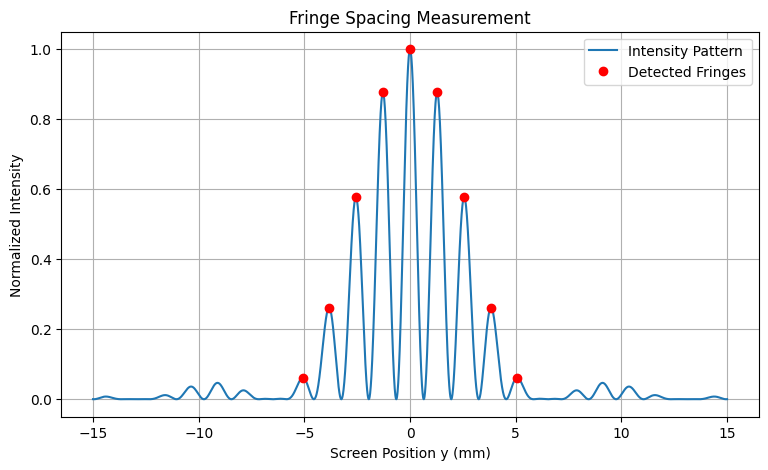

Measured Fringe Spacing ≈ 1.277 mm
Theoretical Fringe Spacing ≈ 1.300 mm
Percentage Error ≈ 1.80%


In [3]:
# ---------------------------------------------
# 📊 Part 2 — AUTOMATIC FRINGE ANALYSIS
# ---------------------------------------------

# Parameters (you can modify these)
wavelength = 650e-9       # meters
L = 1.0                   # screen distance (m)
d = 0.5e-3                # slit separation (m)
a = 0.1e-3                # slit width (m)
y = np.linspace(-0.015, 0.015, 4000)  # screen coordinates (m)

# Calculate angular variables
theta = np.arctan2(y, L)
beta_int = (np.pi * d * np.sin(theta) / wavelength)
beta_diff = (np.pi * a * np.sin(theta) / wavelength)

# Safe sinc definition
sinc = np.ones_like(beta_diff)
nz = beta_diff != 0
sinc[nz] = np.sin(beta_diff[nz]) / beta_diff[nz]

# Combined interference + diffraction
I_comb = (np.cos(beta_int)**2) * (sinc**2)
I_comb /= I_comb.max()

# Smooth data slightly for clean peak detection
I_smooth = gaussian_filter1d(I_comb, sigma=3)

# Find peaks using prominence
peaks, _ = find_peaks(I_smooth, prominence=0.05)
y_peaks = y[peaks]

# Calculate measured fringe spacing
dy_measured = np.mean(np.diff(y_peaks[1:-1]))
dy_theoretical = wavelength * L / d

# Plot pattern + detected peaks
plt.figure(figsize=(9,5))
plt.plot(y*1e3, I_comb, label="Intensity Pattern")
plt.plot(y_peaks*1e3, I_comb[peaks], "ro", label="Detected Fringes")
plt.xlabel("Screen Position y (mm)")
plt.ylabel("Normalized Intensity")
plt.title("Fringe Spacing Measurement")
plt.legend()
plt.grid(True)
plt.show()

# Display numerical comparison
print(f"Measured Fringe Spacing ≈ {dy_measured*1e3:.3f} mm")
print(f"Theoretical Fringe Spacing ≈ {dy_theoretical*1e3:.3f} mm")
print(f"Percentage Error ≈ {abs(dy_measured-dy_theoretical)/dy_theoretical*100:.2f}%")
